## <center> Universidade Federal do Ceará & SiDi - Residência em Segurança da Informação <center>
    
    Grupo 2 - IoT
    Tarefa: Exploração
    Equipe: Davyson Ribeiro, Erik Jhones Freitas, Juliana Lima
    Matrículas: 543043, 543036, 543037

In [1]:
#Bibliotecas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [3]:
#Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Formatação
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 15)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

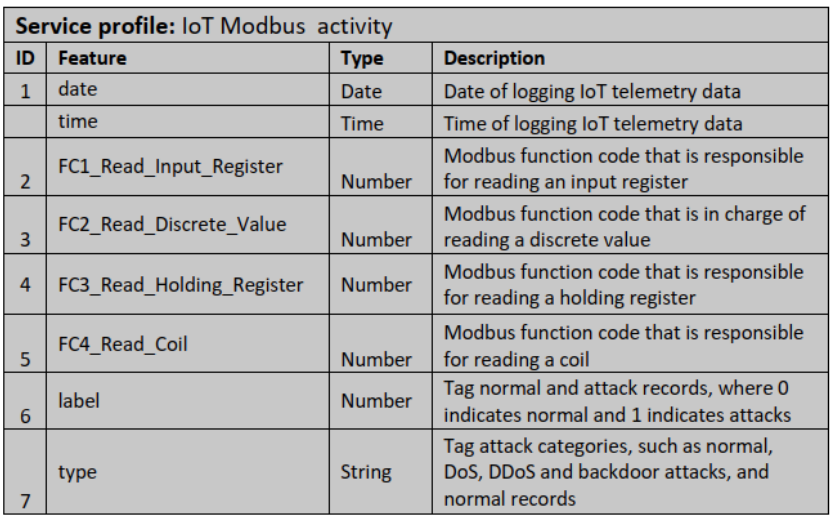

In [8]:
Train_Test_IoT_Modbus = pd.read_csv('datasets/Train_Test_IoT_dataset/Train_Test_IoT_Modbus.csv')
Train_Test_IoT_Modbus

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection
...,...,...,...,...,...,...,...,...,...
51101,1554183533,1-Apr-19,22:38:53,62602,1253,12772,29319,0,normal
51102,1554183536,1-Apr-19,22:38:56,62602,1253,12772,29319,0,normal
51103,1554183537,1-Apr-19,22:38:57,198,38266,33649,44594,0,normal
51104,1554183538,1-Apr-19,22:38:58,198,38266,33649,44594,0,normal


In [9]:
Train_Test_IoT_Modbus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51106 entries, 0 to 51105
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ts                         51106 non-null  int64 
 1   date                       51106 non-null  object
 2   time                       51106 non-null  object
 3   FC1_Read_Input_Register    51106 non-null  int64 
 4   FC2_Read_Discrete_Value    51106 non-null  int64 
 5   FC3_Read_Holding_Register  51106 non-null  int64 
 6   FC4_Read_Coil              51106 non-null  int64 
 7   label                      51106 non-null  int64 
 8   type                       51106 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.5+ MB


In [10]:
Train_Test_IoT_Modbus.head(3)

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection


## Processamento dos Dados
#### Dimensionamento (StandardScaler / Padronização)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Criando outras features usando a hora (hour-minute-second)
Train_Test_IoT_Fridge[['hour', 'minute', 'second']] = Train_Test_IoT_Fridge['time'].str.split(':', expand=True)
Train_Test_IoT_Fridge['hour'] = Train_Test_IoT_Fridge['hour'].astype(int)
Train_Test_IoT_Fridge['minute'] = Train_Test_IoT_Fridge['minute'].astype(int)
Train_Test_IoT_Fridge['second'] = Train_Test_IoT_Fridge['second'].astype(int)

# Criando outras features usando a data (day-month-year)
Train_Test_IoT_Fridge.date = pd.to_datetime(Train_Test_IoT_Fridge.date)
Train_Test_IoT_Fridge['day'] = Train_Test_IoT_Fridge.date.dt.day

# Removendo features
Train_Test_IoT_Fridge.drop(['ts', 'date', 'time', 'label'], axis=1, inplace=True)
Train_Test_IoT_Fridge.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,type,Day,Month,year
0,49389,52921,25770,13625,injection,25,4,2019
1,49389,52921,25770,13625,injection,25,4,2019
2,49389,52921,25770,13625,injection,25,4,2019
3,49389,52921,25770,13625,injection,25,4,2019
4,40665,44748,21098,35371,injection,25,4,2019


In [13]:
# separação de features e label
y_data = Train_Test_IoT_Modbus.type
X_data = Train_Test_IoT_Modbus.drop('type', axis=1)

In [14]:
X_data.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,Day,Month,year
0,49389,52921,25770,13625,25,4,2019
1,49389,52921,25770,13625,25,4,2019
2,49389,52921,25770,13625,25,4,2019
3,49389,52921,25770,13625,25,4,2019
4,40665,44748,21098,35371,25,4,2019


In [15]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51106 entries, 0 to 51105
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   FC1_Read_Input_Register    51106 non-null  int64
 1   FC2_Read_Discrete_Value    51106 non-null  int64
 2   FC3_Read_Holding_Register  51106 non-null  int64
 3   FC4_Read_Coil              51106 non-null  int64
 4   Day                        51106 non-null  int64
 5   Month                      51106 non-null  int64
 6   year                       51106 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [16]:
y_data.head()

0    injection
1    injection
2    injection
3    injection
4    injection
Name: type, dtype: object

In [ ]:
labels = list(y_data.unique())

In [17]:
from sklearn.preprocessing import StandardScaler

preprocessor = Pipeline(steps=[ 
    ('numerical', StandardScaler())
])

In [18]:
X_data.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,Day,Month,year
0,49389,52921,25770,13625,25,4,2019
1,49389,52921,25770,13625,25,4,2019
2,49389,52921,25770,13625,25,4,2019
3,49389,52921,25770,13625,25,4,2019
4,40665,44748,21098,35371,25,4,2019


## Divisão dos dados

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y_data)

# Reparar que está sendo usado o X_data e y_data sem passar o transform neles ainda.

In [20]:
y_train.value_counts()

normal       26249
injection     3750
backdoor      3750
password      3750
xss            433
scanning       397
Name: type, dtype: int64

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Regressão Logística

In [23]:
from sklearn.feature_selection import SelectFromModel

# repare que eu jogue tudo na variavel 'pipeline', ela tem a etapa de preprocesamento e o seu modelo
# por isso fica mais facil utilizar as funções Pipeline no sklearn. 
# fica bem mais simples, coloquei o feature selection tbm.
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LogisticRegression())
])

param_grid_LR = {
                'feature_selection__max_features': [1,2,3],
                'classificador__penalty': ['l1', 'l2'],
                'classificador__C': [0.1, 1.0, 10.0],
                'classificador__solver': ['newton-cg', 'saga'],
                'classificador__max_iter': [100, 1000],
                'classificador__multi_class': ['ovr', 'multinomial'],
                'classificador__class_weight': ['balanced']}

# Repare que o param_grid é passado o nome do classifier dois underscore 
# antes do parametro assim: nomeclassificador__parametro. O nome é passado na string do pipeline
# no caso deixei 'classificador' mesmo.
grid_search = GridSearchCV(pipeline, param_grid=param_grid_LR, cv=5, n_jobs=-1, refit=True)

In [24]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classificador__C': [0.1, 1.0, 10.0],
                         'classificador__class_weight': ['balanced'],
                         'classificador__max_iter': [100, 1000],
                         'classificador__multi_class': ['ovr', 'multinomial'],
                         'classificador__penalty': ['l1', 'l2'],
                         'classificador__solver': ['newton-cg', 'saga'],
                         'feature_selection__max_features': [1, 2, 3]})

In [25]:
X_train.head(3)

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,Day,Month,year
15467,986,27988,34945,59606,31,3,2019
44479,63902,55469,50021,57178,1,4,2019
50952,59218,18731,37877,14724,1,4,2019


In [26]:
# mostra os paramentros
print(grid_search.best_params_)

{'classificador__C': 1.0, 'classificador__class_weight': 'balanced', 'classificador__max_iter': 1000, 'classificador__multi_class': 'multinomial', 'classificador__penalty': 'l1', 'classificador__solver': 'saga', 'feature_selection__max_features': 2}


In [27]:
# essas metricas são do conjunto de validação é pra ver como o modelo se comportou, 
# o std_score é o desvio padrão, ele tem que ser baixo.
# vc não precisa mostrar metrica de valição ou treino. o que importa é a metrica no TESTE.
# o gridsearch faz a validação cruzado k-fold, o cv=5 são 5 folds.
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.63759 +- 0.18122


In [28]:
# aqui eu faço a predição.  EU NÃO DEI O FIT NOVAMENTE
# olha lá em cima como eu passei o gridsearch, tem um paramentro chamado refit, quando eles está true 
# quer dizer que o modelo JÁ É treinado com os melhores parametros, por isso já dou um predict direto

y_pred = grid_search.predict(X_test)

In [29]:
y_test.value_counts()

normal       8751
injection    1250
backdoor     1250
password     1250
xss           144
scanning      132
Name: type, dtype: int64

In [30]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# classification report. Apenas do test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.18      1.00      0.30      1250
   injection       1.00      1.00      1.00      1250
      normal       1.00      0.34      0.51      8751
    password       1.00      1.00      1.00      1250
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       144

    accuracy                           0.55     12777
   macro avg       0.86      0.89      0.80     12777
weighted avg       0.92      0.55      0.59     12777



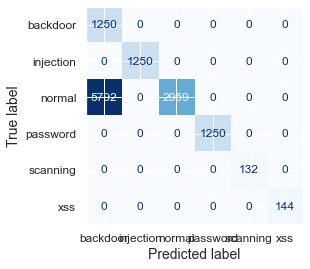

In [33]:
# matrix de confusão. Apenas do teste
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## KNeighborsClassifier

In [34]:
from sklearn.feature_selection import SelectFromModel

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', KNeighborsClassifier())
])

param_grid_KNN = {
                'feature_selection__max_features': [1,2,3],
                'classificador__n_neighbors': [1, 3, 5, 7, 9],
                'classificador__metric': ['euclidean', 'manhatan', 'chebyshev', 'minkowski']}

grid_search = GridSearchCV(pipeline_knn, param_grid=param_grid_KNN, cv=5, n_jobs=-1, refit=True)

In [35]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__metric': ['euclidean', 'manhatan',
                                                   'chebyshev', 'minkowski'],
                         'classificador__n_neighbors': [1, 3, 5, 7, 9],
                         'feature_selection__max_features': [1, 2, 3]})

In [36]:
X_train.head(3)

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,Day,Month,year
15467,986,27988,34945,59606,31,3,2019
44479,63902,55469,50021,57178,1,4,2019
50952,59218,18731,37877,14724,1,4,2019


In [37]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__metric': 'euclidean', 'classificador__n_neighbors': 1, 'feature_selection__max_features': 1}


In [38]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [39]:
y_pred = grid_search.predict(X_test)

In [40]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1250
   injection       1.00      1.00      1.00      1250
      normal       1.00      1.00      1.00      8751
    password       1.00      1.00      1.00      1250
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       144

    accuracy                           1.00     12777
   macro avg       1.00      1.00      1.00     12777
weighted avg       1.00      1.00      1.00     12777



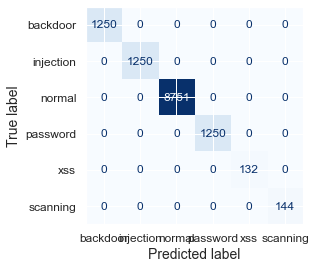

In [41]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Gradient Boosting Master

In [42]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', GradientBoostingClassifier())
])

In [43]:
param_grid_GBM = {
    'feature_selection__max_features': [1,2,3],
    'classificador__learning_rate': [0.1, 0.05],
    'classificador__n_estimators': [50, 100],
    'classificador__max_depth': [2, 3],
    'classificador__min_samples_split': [2, 4],
    'classificador__min_samples_leaf': [1, 2],
    'classificador__max_features': ['auto', 'sqrt'],
    'classificador__subsample': [0.8, 1.0]}

grid_search = GridSearchCV(pipeline_gbm, param_grid=param_grid_GBM, cv=5, n_jobs=-1, refit=True)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__learning_rate': [0.1, 0.05],
                         'classificador__max_depth': [2, 3],
                         'classificador__max_features': ['auto', 'sqrt'],
                         'classificador__min_samples_leaf': [1, 2],
                         'classificador__min_samples_split': [2, 4],
                         'classificador__n_estimators': [50, 100],
                         'classificador__subsample': [0.8, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [45]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__learning_rate': 0.1, 'classificador__max_depth': 2, 'classificador__max_features': 'auto', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 50, 'classificador__subsample': 0.8, 'feature_selection__max_features': 1}


In [46]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [47]:
y_pred = grid_search.predict(X_test)

In [48]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1250
   injection       1.00      1.00      1.00      1250
      normal       1.00      1.00      1.00      8751
    password       1.00      1.00      1.00      1250
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       144

    accuracy                           1.00     12777
   macro avg       1.00      1.00      1.00     12777
weighted avg       1.00      1.00      1.00     12777



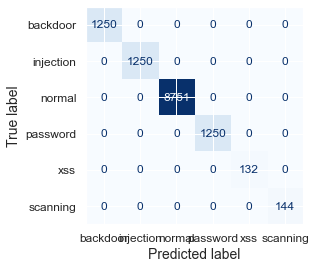

In [50]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Nayve Bayes BernoulliNB

In [51]:
pipeline_nb = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', BernoulliNB())
])

param_grid_NB = {
    'feature_selection__max_features': [1,2,3],
    'classificador__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(pipeline_nb, param_grid=param_grid_NB, cv=5, n_jobs=-1, refit=True)

In [52]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'classificador__alpha': [0.1, 0.5, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [53]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__alpha': 0.1, 'feature_selection__max_features': 1}


In [54]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.68483 +- 0.00002


In [55]:
y_pred = grid_search.predict(X_test)

In [56]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      1250
   injection       0.00      0.00      0.00      1250
      normal       0.68      1.00      0.81      8751
    password       0.00      0.00      0.00      1250
    scanning       0.00      0.00      0.00       132
         xss       0.00      0.00      0.00       144

    accuracy                           0.68     12777
   macro avg       0.11      0.17      0.14     12777
weighted avg       0.47      0.68      0.56     12777



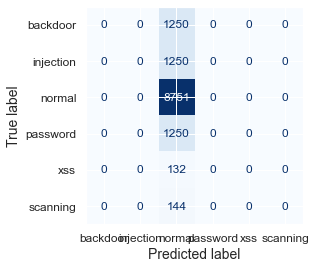

In [57]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Linear Discriminant Analysis

In [58]:
pipeline_lda = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LinearDiscriminantAnalysis())
])

param_grid_LDA = {
    'feature_selection__max_features': [1,2,3],
    'classificador__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipeline_lda, param_grid=param_grid_LDA, cv=5, n_jobs=-1, refit=True)

In [59]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classificador__solver': ['svd', 'lsqr', 'eigen'],
                         'feature_selection__max_features': [1, 2, 3]})

In [60]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__solver': 'svd', 'feature_selection__max_features': 1}


In [61]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.68483 +- 0.00002


In [62]:
y_pred = grid_search.predict(X_test)

In [63]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.00      0.00      0.00      1250
   injection       0.00      0.00      0.00      1250
      normal       0.68      1.00      0.81      8751
    password       0.00      0.00      0.00      1250
    scanning       0.00      0.00      0.00       132
         xss       0.00      0.00      0.00       144

    accuracy                           0.68     12777
   macro avg       0.11      0.17      0.14     12777
weighted avg       0.47      0.68      0.56     12777



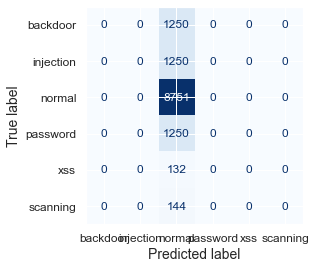

In [64]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine DecisionTreeClassifier

In [65]:
pipeline_dtc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', DecisionTreeClassifier())
])

param_grid_DTC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__max_depth': [2, 4, 6],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(pipeline_dtc, param_grid=param_grid_DTC, cv=5, n_jobs=-1, refit=True)

In [66]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__class_weight': [None, 'balanced'],
                         'classificador__criterion': ['gini', 'entropy'],
                         'classificador__max_depth': [2, 4, 6],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'feature_selection__max_features': [1, 2, 3]})

In [67]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__class_weight': None, 'classificador__criterion': 'gini', 'classificador__max_depth': 6, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'feature_selection__max_features': 1}


In [68]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [69]:
y_pred = grid_search.predict(X_test)

In [70]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1250
   injection       1.00      1.00      1.00      1250
      normal       1.00      1.00      1.00      8751
    password       1.00      1.00      1.00      1250
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       144

    accuracy                           1.00     12777
   macro avg       1.00      1.00      1.00     12777
weighted avg       1.00      1.00      1.00     12777



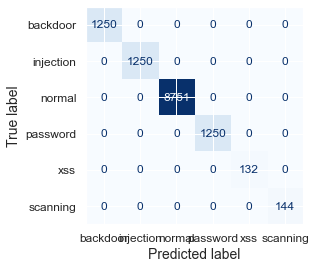

In [71]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine RandomForestClassifier

In [72]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', RandomForestClassifier())
])

param_grid_RFC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__n_estimators': [100, 300, 500],
    'classificador__max_depth': [3, 5, 7],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__bootstrap': [True, False]}

grid_search = GridSearchCV(pipeline_rfc, param_grid=param_grid_RFC, cv=5, n_jobs=-1, refit=True)

In [73]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__bootstrap': [True, False],
                         'classificador__max_depth': [3, 5, 7],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'classificador__n_estimators': [100, 300, 500],
                         'feature_selection__max_features': [1, 2, 3]})

In [74]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__bootstrap': True, 'classificador__max_depth': 5, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 100, 'feature_selection__max_features': 1}


In [75]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [76]:
y_pred = grid_search.predict(X_test)

In [77]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1250
   injection       1.00      1.00      1.00      1250
      normal       1.00      1.00      1.00      8751
    password       1.00      1.00      1.00      1250
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       144

    accuracy                           1.00     12777
   macro avg       1.00      1.00      1.00     12777
weighted avg       1.00      1.00      1.00     12777



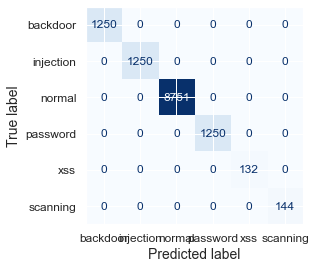

In [78]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()